In [3]:
using NamedTrajectories
using QuantumCollocation
using PGFPlotsX
using Colors
using LaTeXStrings

In [4]:
data_path = "results/mintime/Y_gate_T_100_Q_100.0_R_0.01_R_smoothness_0.001_iter_10000_fidelity_0.9999997188819991_00000.jld2"
data = load_problem(data_path; return_data=true)

Loading data dict from results/mintime/Y_gate_T_100_Q_100.0_R_0.01_R_smoothness_0.001_iter_10000_fidelity_0.9999997188819991_00000.jld2:

   duration = 0.8662448093118121
   exp fidelity = 0.9999996576788037


Dict{String, Any} with 6 entries:
  "options"      => Options{Float64}(1.0e-8, 100.0, 1000, 1.0e6, 1.0, 1.0e-12, …
  "duration"     => 0.866245
  "exp fidelity" => 1.0
  "params"       => Dict{Symbol, Any}(:eval_hessian=>true, :objective_terms=>Di…
  "system"       => QuantumSystem{Float64}([0.0 0.0; 0.0 0.0], [0.0 0.0; 0.0 0.…
  "trajectory"   => NamedTrajectory{Float64}([1.0 1.0 … 0.0165864 0.000585082; …

In [5]:
traj = data["trajectory"]

NamedTrajectory{Float64}([1.0 1.0 … 0.016586375872567644 0.000585082373268197; 0.0 7.211089380573516e-34 … 0.9998624366058632 0.9999998288392934; … ; 0.0 1.1444017889603964e-27 … -9.955736996525347e-28 0.0; 0.008662448093118134 0.008662448093118134 … 0.008662448093118134 0.008662448093118134], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.9999998288392933, 0.0005850823732681715, -5.883963447262998e-31, 3.717800139049293e-31, 3.717799905127065e-31, 5.883963200684691e-31, 0.0, 0.0, 0.0, 0.008662448093118134], 100, :Δt, 12, (Ũ⃗ = 8, γ = 2, α = 1, Δt = 1, states = 8, controls = 4), (Δt = ([0.005000000000000001], [0.05]),), (Ũ⃗ = [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], γ = [0.0, 0.0], α = [0.0]), (γ = [0.0, 0.0], α = [0.0]), (Ũ⃗ = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0],), (Ũ⃗ = 1:8, γ = 9:10, α = 11:11, Δt = 12:12, states = [1, 2, 3, 4, 5, 6, 7, 8], controls = [9, 10, 11, 12]), (:Ũ⃗, :γ, :α, :Δt), (:Ũ⃗,), (:γ, :α, :Δt))

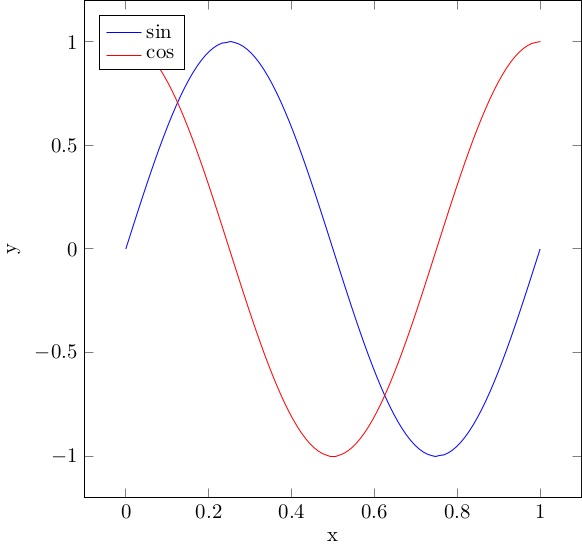

In [6]:
x = LinRange(0, 1, 100)
y = sin.(2π*x)
z = cos.(2π*x)

# plot the data
@pgf ax = Axis(
    {
        xlabel="x",
        ylabel="y",
        width="10cm",
        height="10cm",
        legend_pos="north west",
        legend_cell_align="left",
        legend_entries={
            "sin"=nothing,
            "cos"=nothing,
        },
    },
    Plot(
        {mark="none", color="blue"},
        Coordinates(x, y),
    ),
    Plot(
        {mark="none", color="red"},
        Coordinates(x, z),
    ),
) 

# show the plot
display("image/png", ax)

In [7]:
# function to plot matrix of data wher first row is independent variable
function plot_pgf(
    data::Matrix{<:Real}, 
    title::AbstractString,
    xlabel::AbstractString, 
    ylabel::AbstractString, 
    labels::Union{Nothing,Vector{<:AbstractString}}=nothing;
    height="7cm",
    width="10cm",
)
    x = data[1, :]
    plots = []
    colors = distinguishable_colors(
        size(data, 1)-1, 
        [RGB(1,1,1), RGB(0,0,0), RGB(1,0,0)], 
        dropseed=true
    )
    for (i, color) in zip(2:size(data, 1), colors)
        plot = @pgf Plot(
            {mark="none", color=color},
            Coordinates(x, data[i, :]),
        )
        push!(plots, plot)
    end
    @pgf ax = Axis(
        {
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
            width="10cm",
            height="10cm",
            legend_pos="north east",
            legend_cell_align="left",
            legend_entries=labels,
            height=height,
            width=width,
        },
        plots...,
        Legend()
    ) 
    return ax
end

plot_pgf (generic function with 2 methods)

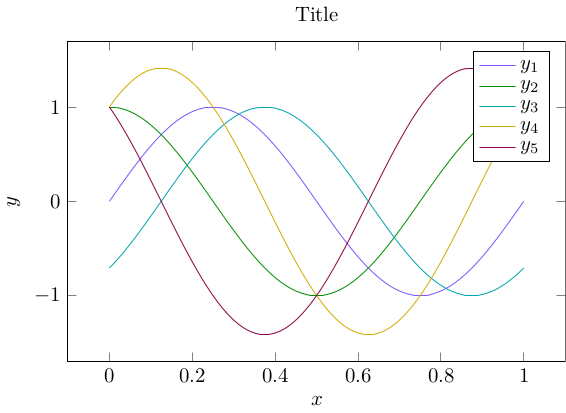

In [8]:
x = LinRange(0, 1, 100)
y1 = sin.(2π*x)
y2 = cos.(2π*x)
y3 = sin.(2π*x .- π/4)
y4 = cos.(2π*x) + sin.(2π*x)
y5 = cos.(2π*x) - sin.(2π*x)
data = hcat(x, y1, y2, y3, y4, y5)' |> collect
labels = collect([latexstring("y_$i") for i = 1:size(data, 1)-1])
ax = plot_pgf(data, "Title", L"x", L"y", labels)
display("image/png", ax)

In [23]:
function plot_states_and_controls(
    states::AbstractMatrix{<:Real},
    controls::AbstractMatrix{<:Real},
    times::AbstractVector{<:Real};
    xlabel::AbstractString=L"time, $t\ [\mu s]$",
    ylabel_controls::AbstractString=L"u",
    ylabel_states::AbstractString=L"x",
    control_labels=collect([latexstring("u_$i") for i = 1:size(controls, 1)]),
    state_labels=collect([latexstring("x_$i") for i = 1:size(states, 1)]),
    height="5cm",
    width="10cm",
)
    times = collect(times)

    state_colors = distinguishable_colors(
        size(states, 1), 
        [RGB(1,1,1), RGB(0,0,0), RGB(1,0,0), RGB(0,1,0)], 
        dropseed=true
    )

    state_plots = []

    for (i, color) in zip(1:size(states, 1), state_colors)
        plot = @pgf Plot(
            if i > 2
                {
                    mark="none", 
                    style={ very_thick }, 
                    color=color, 
                    dashed=true
                }
            else
                {
                    mark="none", 
                    style={ thick }, 
                    color=color
                }
            end,
            Coordinates(times, states[i, :]),
        )
        push!(state_plots, plot)
    end

    control_colors = distinguishable_colors(
        size(controls, 1), 
        [RGB(1,1,1), RGB(0,0,0), RGB(1,0,0), RGB(0,1,0)], 
        dropseed=true
    )

    control_plots = []

    for (i, color) in zip(1:size(controls, 1), control_colors)
        plot = @pgf Plot(
            if i == 2
                {
                    mark="none", 
                    style={ very_thick }, 
                    color=color, 
                    dashed=true
                }
            else
                {
                    mark="none", 
                    style={ thick }, 
                    color=color
                }
            end,
            Coordinates(times, controls[i, :]),
        )
        push!(control_plots, plot)
    end

    @pgf gp = GroupPlot(
        {
            group_style={
                group_size="1 by 2",
                vertical_sep="2cm",
            },
            height=height,
            width=width,
        },
        Axis(
            {
                title="States",
                xlabel=xlabel,
                ylabel=ylabel_states,
                legend_pos="outer north east",
                legend_cell_align="left",
                legend_entries=state_labels,
            },
            state_plots...,
            Legend()
        ),
        Axis(
            {
                title="Controls",
                xlabel=xlabel,
                ylabel=ylabel_controls,
                legend_pos="outer north east",
                legend_cell_align="left",
                legend_entries=control_labels,
            },
            control_plots...,
            Legend()
        ),
    )
    return gp
end

plot_states_and_controls (generic function with 1 method)

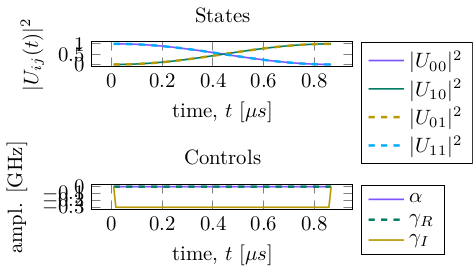

In [34]:
U_pops = hcat([vec(abs2.(iso_vec_to_operator(traj.Ũ⃗[:,t]))) for t = 1:traj.T]...)

fig = plot_states_and_controls(
    U_pops,
    vcat(traj.α, traj.γ) / 2π,
    get_times(traj);
    ylabel_states=L"|U_{ij}(t)|^2",
    ylabel_controls="ampl. [GHz]",
    control_labels=[L"\alpha", L"\gamma_{R}", L"\gamma_{I}"],
    state_labels=[L"|U_{00}|^2", L"|U_{10}|^2", L"|U_{01}|^2", L"|U_{11}|^2"],
    height="2cm",
    width="6cm"
)
display("image/png", fig)

In [35]:
pgfsave("single_qubit.tikz", fig)

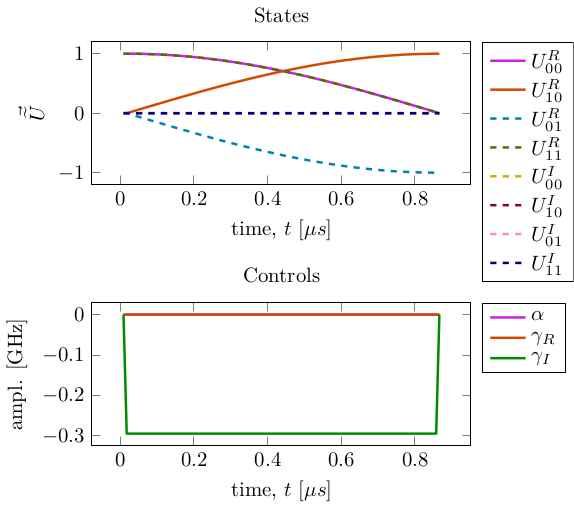

In [11]:
plot = plot_states_and_controls(
    traj.states,
    vcat(traj.α, traj.γ) / 2π,
    get_times(traj);
    ylabel_states=L"\vec{\widetilde{U}}",
    ylabel_controls="ampl. [GHz]",
    control_labels=[L"\alpha", L"\gamma_{R}", L"\gamma_{I}"],
    state_labels=[L"U^R_{00}", L"U^R_{10}", L"U^R_{01}", L"U^R_{11}", L"U^I_{00}", L"U^I_{10}", L"U^I_{01}", L"U^I_{11}"],
    height="4cm",
    width="8cm"
)
display("image/png", plot)

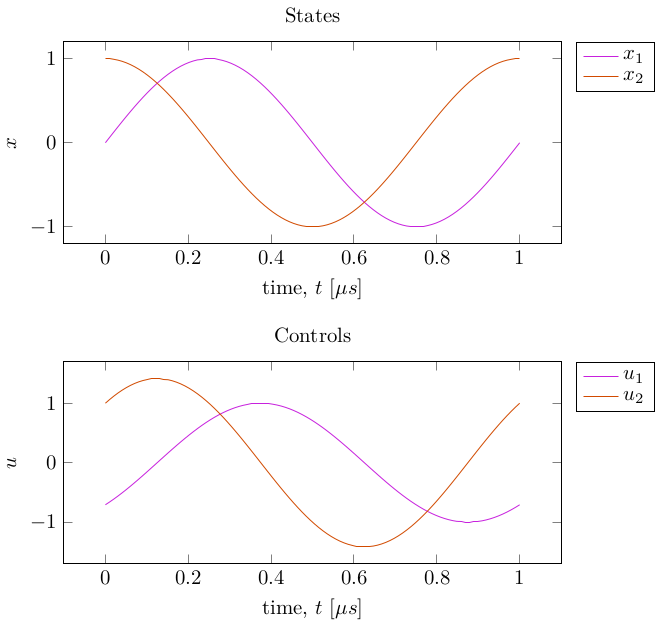

In [79]:
t = LinRange(0, 1, 100)
x1 = sin.(2π*t)
x2 = cos.(2π*t)
u1 = sin.(2π*t .- π/4)
u2 = cos.(2π*t) + sin.(2π*t)

gp = plot_states_and_controls(
    hcat(x1, x2)', 
    hcat(u1, u2)', 
    t, 
)
display("image/png", gp)